In [1]:
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 4, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

### Linear Time Series Analysis and Its Application
#### 1. Stationarity

- strict stationarity
    - 임의의 자연수 $t_1, t_2, \cdots, t_n$과 자연수 k에 대하여 n개의 확률변수에 대한 결합확률밀도함수와, 이 n개의 확률변수에서 k만큼의 시간 축을 이동하였을 때의 결합확률밀도함수가 동일하다면, 이 시계열은 강정상성(Strict Stationarity)를 갖는다고 한다.
    - 따라서 어떤 확률과정이 강정상성 조건을 만족한다면 모든 n에 대하여 결합확률밀도함수가 시간대를 바꾸어도 동일하다는 것을 보여야 하므로, 어떠한 시간대이든 분포가 항상 동일해야 한다.

- weak stationarity
    - 확률과정이 유한한 2차 적률(**Finite Second Moment**)을 갖고, 기댓값과 분산이 시점 t와 무관하게 항상 일정하며 자기공분산이 시점 t가 아닌 시차 k에 의존한다면 이를 약한 의미의 정상성을 갖는다고 한다.
    - $\mathrm{E}(Z_t) = \mu,~~ \mu \in \mathbf{R}$
    - $\mathrm{Var}(Z_t) = \sigma ^ 2, ~~ \sigma ^ 2 \in \mathbf{R}$
    - $\mathrm{Cov}(Z_t, Z_{t+k}) = \sigma_K, ~~\mathrm{for~any~t,h \geq 1}$
    - 대표적인 약정상성을 가진 확률과정을 `White Noise Process`라고 한다

#### 2. Correlation and Autocorrelation Function

The correlation coefficient between 2 random variables X and Y is defined as

$$\rho_{x,y} = \frac{\mathrm{Cov}(X,Y)}{\sqrt{\mathrm{Var}(X)\mathrm{Var}(Y)}} = \frac{E[(X-\mu_x)(Y-\mu_y)]}{\sqrt{E(X-\mu_x)^2 E(Y-\mu_y)^2}}$$

When the sample $\{(x_t,y_t)\}_{t=1}^T$ is available, the correlation can be consistently estimated by its sample counterpart

$$\hat{\rho_{x,y}} = \frac{\sum_{t=1}^T(x_t-\bar{x})(y_t-\bar{y})}{\sqrt{\sum_{t=1}^T(x_t-\bar{x})^2 \sum_{t=1}^T(y_t-\bar{y})^2}}$$

**Autocorrelation Function (ACF)**

Consider a weakly stationary return series $r_t$. When the linear dependence between $r_t$ and its past values $r_{t−i}$ is of interest, the concept of correlation is generalized to autocorrelation. The correlation coefficient between $r_t$ and $r_{t−l}$ is called the lag- autocorrelation of rt and is commonly denoted by $ρ_l$ , which under the weak stationarity assumption is a function of only. Specifically, we define

$$\rho_{x,y} = \frac{\mathrm{Cov}(r_t,r_{t-l})}{\sqrt{\mathrm{Var}(r_t)\mathrm{Var}(r_{t-l})}} = \frac{\mathrm{Cov}(r_t,r_{t-l})}{\mathrm{Var}(r_t)} = \frac{\gamma_l}{\gamma_0}$$

금융 시계열 데이터는 white noise process가정을 충족하는가?

In [5]:
df # KOSPI index

Date
2010-01-04    1696.14
2010-01-05    1690.62
2010-01-06    1705.32
2010-01-07    1683.45
2010-01-08    1695.26
               ...   
2023-04-24    2523.50
2023-04-25    2489.02
2023-04-26    2484.83
2023-04-27    2495.81
2023-04-28    2501.53
Name: Close, Length: 3290, dtype: float64

**return을 계산하는 두 가지 방법**
- differencing : 당일 종가에서 전날 종가를 뺀 뒤, 당일 종가로 나누어 계산한다.
- log differencing : 전날과 당일 종가를 모두 자연 로그로 변환한 뒤, 그 차로 계산한다. `pandas.DataFrame.pct_change()`를 사용한다

In [11]:
df_diff = (df - df.shift(1)) / df
df_diff.head(5)

Date
2010-01-04         NaN
2010-01-05   -0.003265
2010-01-06    0.008620
2010-01-07   -0.012991
2010-01-08    0.006966
Name: Close, dtype: float64

In [46]:
df_log = df.pct_change().dropna()
df_log.head(5)

Date
2010-01-05   -0.003254
2010-01-06    0.008695
2010-01-07   -0.012825
2010-01-08    0.007015
2010-01-11   -0.000672
Name: Close, dtype: float64

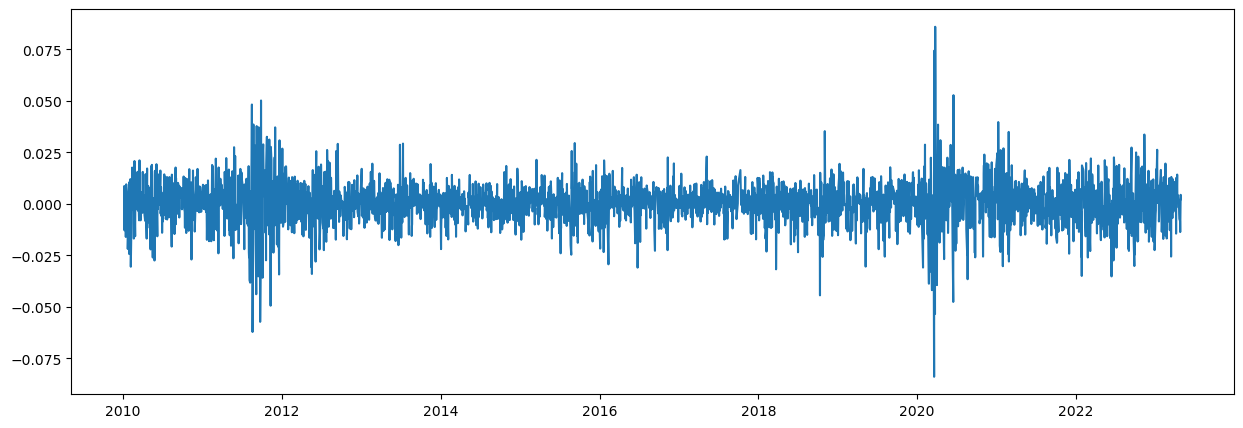

In [57]:
plt.style.use('default')
plt.figure(figsize = (15,5))
plt.plot(df_log)

log difference data가 가격 변화에 더 강건한 경향을 보이고, 다른 자료간 비교도 쉽기 때문에 log difference를 사용하도록 한다

In [48]:
from statsmodels.tsa import stattools

n_lags = 10
atcf_qs = stattools.acf(np.log(df), nlags = n_lags, qstat = True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat

In [49]:
atcf_qs[0] # Autocorrelation Functions

array([1.        , 0.99715129, 0.99426261, 0.99121285, 0.98808575,
       0.98508449, 0.9820863 , 0.97932906, 0.97634945, 0.9733879 ,
       0.97032591])

statsmodel.tsa의 stattools 내의 acf 함수를 사용해서 autocorrelation function의 값을 확인할 수 있다

확인한 결과, 원 시계열(`np.log(df)`)에 대해서는 강한 memory가 있는 것으로 관측된다

In [50]:
atcf_qs = stattools.acf(df_log.dropna(), nlags = n_lags, qstat = True)
atcf_qs[0]

array([ 1.        ,  0.00537671,  0.04110297,  0.00619632, -0.02972457,
       -0.00586147, -0.05436509,  0.03388055,  0.00101711,  0.02662817,
       -0.01867902])

차분 시계열에 대해서는 memory가 관측되지 않는다. 즉, weak stationary를 보이고 있다

In [51]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

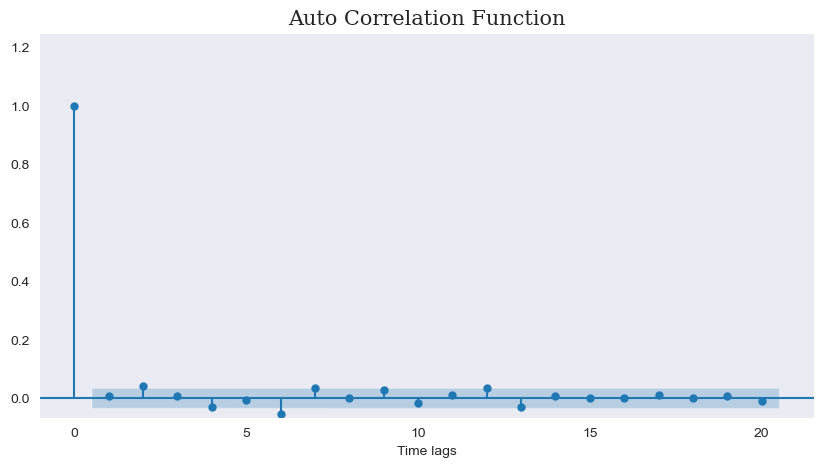

In [55]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_log, auto_ylims = True, lags = 20, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

#### 3. White Noise and Linear Time Series
**Linear Time Series**

A time series $r_t$ is said to be linear if it can be written as

$$r_t = \mu + \sum_{i=0}^\infty \psi_i a_{t-i}$$
where $μ$ is the mean of $_t$ , $ψ_0$ = 1, and ${a_t}$ is a sequence of iid random variables with mean zero and a well-defined distribution (i.e., ${a_t}$ is a white noise series). It will be seen later that at denotes the new information at time $t$ of the time series and is often referred to as *the innovation* or *shock* at time $t$

If $r_t$ is weakly stationary, we can obtain its mean and variance easily by using the independence of ${a_t }$ as

$$E(r_t) = \mu, ~~~~~ \mathrm{Var}(r_t) = \sigma_a^2 \sum_{i=0}^\infty \psi_i^2$$

where $σ_a^2$ is the variance of $a_t$ .

The lag-$l$autocovariance of $r_t$ is

$$\gamma_l = \mathrm{Cov}(r_t,r_{t-l}) = E \Big[ \big( \sum_{i=0}^\infty \psi _i a_{t-i}\big)\big( \sum_{j=0}^\infty \psi_j a_{t-l-j} \big) \Big]$$

#### 4. Simple AR Models
A simple model that makes use of such predictive power is
$$r_t = \phi_0 + \phi_1 r_{t-1} + a_t$$
where ${a_t}$ is assumed to be a white noise series with mean zero and variance $σ_a^2$.

However, here it suffices to note that an $\mathrm{AR(1)}$ model implies that, conditional on the past return $r_{t−1}$, we have

$$E(r_t|r_{t-1}) = \phi_0 + \phi_1 r_{t-1}, ~~~~~ \mathrm{Var}(r_t|r_{t-1}) = \mathrm{Var}(a_t) = \sigma_a^2$$

A straightforward generalization of the $\mathrm{AR(1)}$ model is the $\mathrm{AR(p)}$ model:

$$r_t = \phi_0 + \phi_1 r_{t-1} + \cdots + \phi_p r_{t-p} + a_t$$

#### 5. Simple MA Models

The general form of an $\mathrm{MA(1)}$ model is

$$r_t = c_0 + a_t - \theta_1 a_{t-1}~~~~\mathrm{or}~~~~r_t = c_0 + (1-\theta_1 B)a_t$$

Similarly, an $\mathrm{MA(q)}$ model is

$$r_t = c_0 + a_t - \theta_1 a_{t-1} - \cdots - \theta_q a_{t-q}$$

#### 6. Simple ARMA Models

A time series $r_t$ follows an $\mathrm{ARMA(1,1)}$ model if it satisfies

$$r_t = \phi_0 + \phi_1 r_{t-1} + a_t - \theta_1 a_{t-1}$$

Similarly, an $\mathrm{ARMA}(p,q)$ model is in the form

$$r_t = \phi_0 + \sum_{i=1}^p \phi_i r_{t-i} + a_t - \sum_{i=1}^q \theta_i a_{t-i}$$

**Practice**
ARMA 모델을 찾기 위해서는 우선, AR과 MA의 차수를 각각 구해야 한다.

- 원 시계열의 Partial ACF의 형태를 보고 AR의 차수를 구할 수 있다.
- 차분 데이터의 ACF의 형태를 보고 MA의 차수를 구할 수 있다.

<Figure size 1000x800 with 0 Axes>

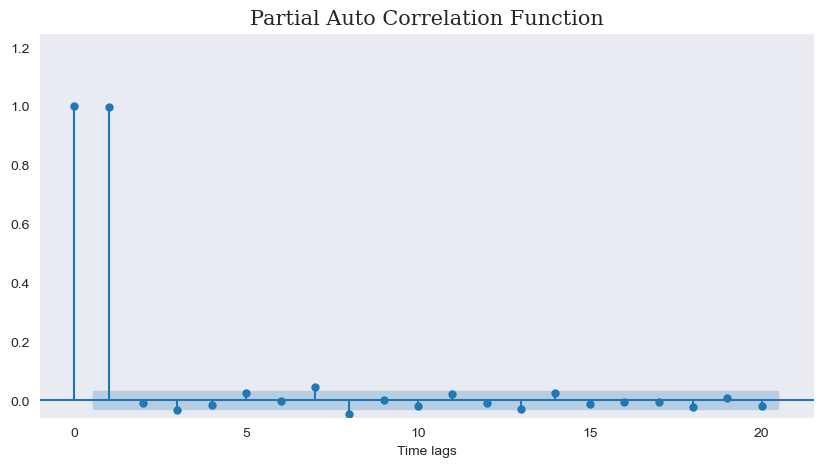

In [58]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

$\mathbf{AR}$의 차수는 푸른색 영역을 벗어나는 지점인 1이 적당하다

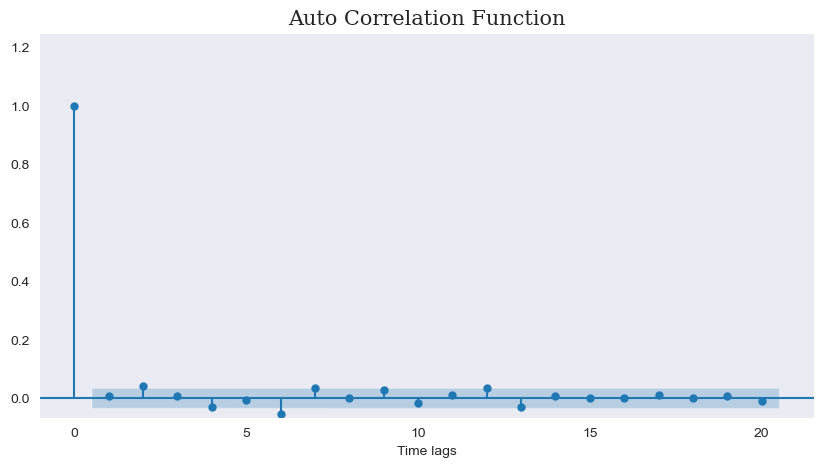

In [59]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_log, auto_ylims = True, lags = 20, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

$\mathbf{MA}$의 차수는 푸른색 영역을 벗어나는 지점인 0이 적당하다
- 최종적으로, $\mathbf{ARMA}(1,0)$이 모형을 표현하는데 가장 적합하다고 판단하였다

In [63]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(np.log(df), order = (1,0,0), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3290
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10335.517
Date:                Sat, 06 May 2023   AIC                         -20665.034
Time:                        19:13:07   BIC                         -20646.738
Sample:                             0   HQIC                        -20658.484
                               - 3290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6638      0.071    108.306      0.000       7.525       7.803
ar.L1          0.9978      0.001    983.731      0.000       0.996       1.000
sigma2         0.0001   1.34e-06     81.536      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              5331.68
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

주의 : ARMA모형은 시계열 모형이므로, 정상 확률과정인 return에 모델을 적용하는 것이 아닌 원 시계열 데이터에 적용해야 한다

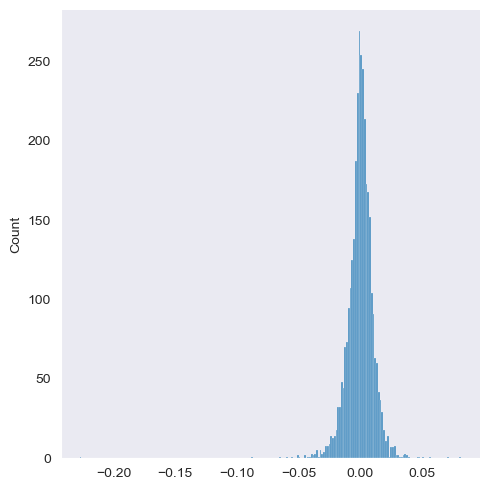

In [64]:
sns.displot(model.resid)

Text(0.5, 1.0, 'Residual vs. Normal')

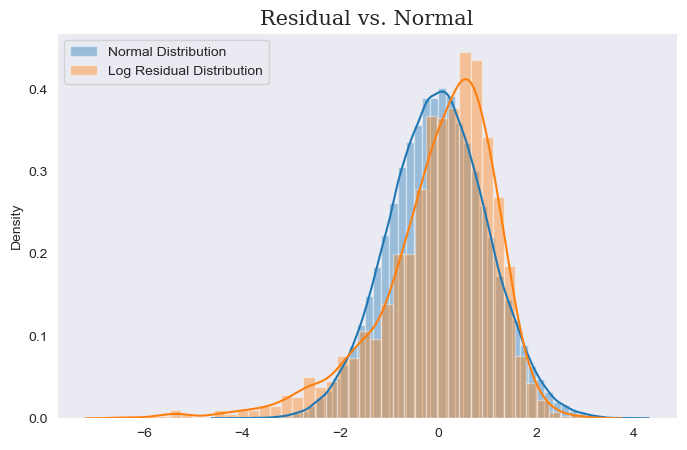

In [66]:
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(np.random.normal(size=100000), kde = True, ax = ax1, label = 'Normal Distribution')
sns.distplot(np.log(model.resid) - np.log(model.resid).mean() ,
             kde = True, rug = False , ax = ax1, label = 'Log Residual Distribution')
plt.legend()
plt.title('Residual vs. Normal', fontsize = 15, fontfamily = 'Serif')

시계열 모형이 제대로 추정되었는지 확인하기 위해, 잔차 분포를 꼭 확인해야 한다.
정규분포에 가까울수록 좋은 모델이다